In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

In [2]:
df_left = pd.DataFrame({"X_0": np.ones(8),
                        "X_1": [0.52, 0.43, 0.42, 0.61, 1.02, 1.05, 1.37, 1.98],
                        "X_2": [0.54, 1.79, 2.21, 1.04, 0.47, 1.38, 0.88, 0.23],
                        "y": np.zeros(8)
                       })

In [3]:
df_right = pd.DataFrame({"X_0": np.ones(10),
                         "X_1": [1.25, 1.74, 1.99, 2.03, 2.38, 2.69, 2.65, 3.15, 3.09, 3.51],
                         "X_2": [3.13, 3.54, 2.95, 2.27, 3.46, 1.74, 3.03, 1.13, 2.37, 1.79],
                         "y": np.ones(10)
                        })

<IPython.core.display.Javascript object>


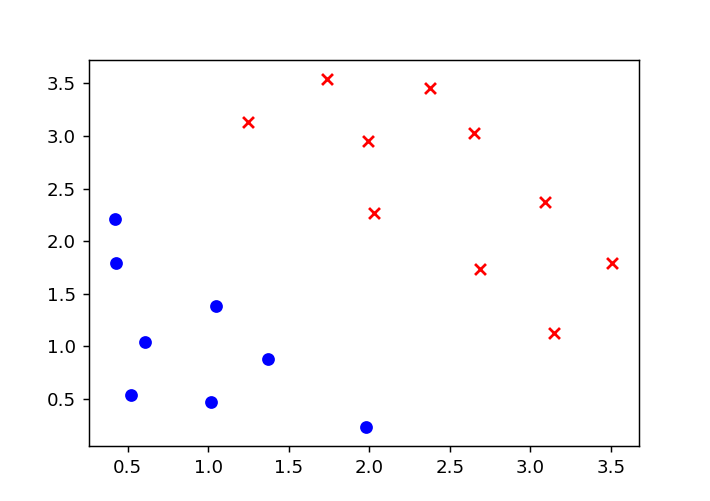

In [4]:
plt.scatter(x=df_left["X_1"], y=df_left["X_2"], marker="o", c="blue")
plt.scatter(x=df_right["X_1"], y=df_right["X_2"], marker="x", c="red")

### 生成向量和矩阵

In [5]:
df_tmp = pd.concat([df_left, df_right], ignore_index=True)
np_tmp = df_tmp.to_numpy()

In [6]:
np_tmp

array([[1.  , 0.52, 0.54, 0.  ],
       [1.  , 0.43, 1.79, 0.  ],
       [1.  , 0.42, 2.21, 0.  ],
       [1.  , 0.61, 1.04, 0.  ],
       [1.  , 1.02, 0.47, 0.  ],
       [1.  , 1.05, 1.38, 0.  ],
       [1.  , 1.37, 0.88, 0.  ],
       [1.  , 1.98, 0.23, 0.  ],
       [1.  , 1.25, 3.13, 1.  ],
       [1.  , 1.74, 3.54, 1.  ],
       [1.  , 1.99, 2.95, 1.  ],
       [1.  , 2.03, 2.27, 1.  ],
       [1.  , 2.38, 3.46, 1.  ],
       [1.  , 2.69, 1.74, 1.  ],
       [1.  , 2.65, 3.03, 1.  ],
       [1.  , 3.15, 1.13, 1.  ],
       [1.  , 3.09, 2.37, 1.  ],
       [1.  , 3.51, 1.79, 1.  ]])

In [7]:
X = np_tmp[:, :3]
y = np_tmp[:, [-1]]

X = np.matrix(X)
y = np.matrix(y)

### 定义Logistic回归的代价函数

In [8]:
# 定义s函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
# h(x) = g(z) = sigmoid(X * theta.T)
def cost(theta, X, y):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
    
    h_x = sigmoid(X * theta.T)
    first = np.multiply(-y, np.log(h_x))
    second = np.multiply(1-y, np.log(1- h_x))
    return np.sum(first - second) / len(X)

### 梯度下降法

In [10]:
#步长
step_alpha = 0.5
m, n  = X.shape

In [11]:
# 梯度下降法
def grad_descent(theta, X, y, m):
    h_x = sigmoid(X * theta.T)
    # print("h_x的值: ", h_x.T)
    # 偏导求值
    partial_1 = np.multiply( h_x - y, X)
    partial_2 = np.sum(partial_1, axis=0) / m
    
    return theta - step_alpha * partial_2

### 线性决策边界

In [12]:
# 梯度下降迭代80次，并记录代价函数
# !!! 2020.03.20
# 刚开始只迭代80次，而且步长选取0.05，很慢，导致迭代完成时theta根本
# 还没有收敛，并非我梯度下降法向量部分代码写的有问题，mmp我还查了2小时!!!

# 设置参数初始初始值全为1
theta = np.ones(n)
theta = np.matrix(theta)

df_cost = pd.DataFrame(columns=['steps', 'cost'])
df_cost.loc[0] = [0, cost(theta, X, y)]

for i in range(1, 1000):
    #print("第%d次" %i)
    theta = grad_descent(theta, X, y, m)
    df_cost.loc[i] = [i, cost(theta, X, y)]

In [13]:
# 防止画图中文乱码
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

<IPython.core.display.Javascript object>


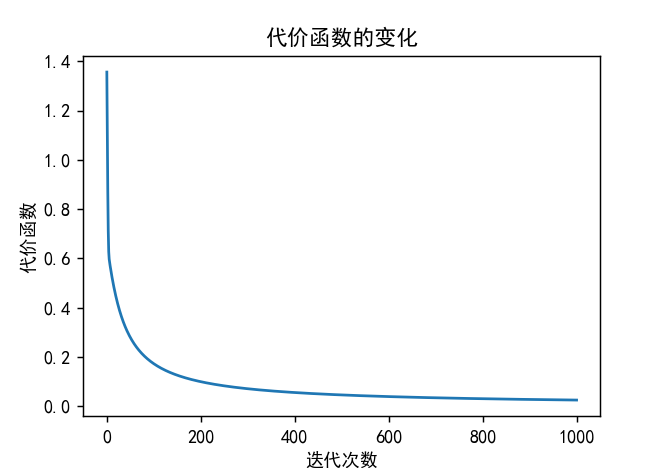

Text(0.5, 1.0, '代价函数的变化')

In [14]:
fig = plt.figure()
fig.add_subplot(1, 1, 1)
plt.plot(df_cost["steps"], df_cost["cost"] )
plt.xlabel("迭代次数")
plt.ylabel("代价函数")
plt.title("代价函数的变化")

In [15]:
X * theta.T < 0

matrix([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [17]:
x_tmp = np.arange(0, 3.6, 0.1)
y_tmp = -(theta[0, 0] + theta[0, 1] * x_tmp) / theta[0, 2]

<IPython.core.display.Javascript object>


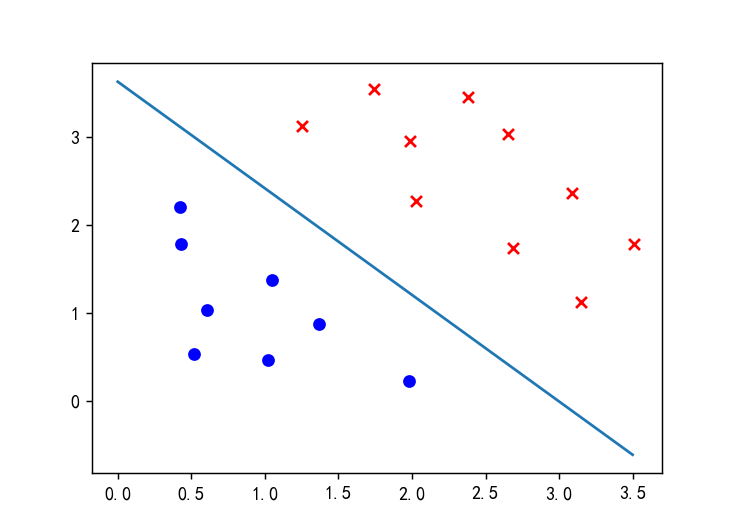

In [18]:
fig = plt.figure()
fig.add_subplot(1, 1, 1)
plt.scatter(x=df_left["X_1"], y=df_left["X_2"], marker="o", c="blue")
plt.scatter(x=df_right["X_1"], y=df_right["X_2"], marker="x", c="red")
plt.plot(x_tmp, y_tmp)

### 圆形决策边界

In [19]:
size = 12
df_inner = pd.DataFrame({"X_0": np.ones(size),
                        "X_1": [-0.88, -0.77, -0.78, -0.46, -0.43, -0.35, -0.22, 0.00, 0.24, 0.25, 0.51, 0.62],
                        "X_2": [0.01, 0.56, -0.47, 0.40, -0.18, 0.88, -0.76, 0.62, 0.02, -0.91, 0.38, -0.29],
                        "y": np.zeros(size)
                       })
df_outer = pd.DataFrame({"X_0": np.ones(size),
                         "X_1": [-1.51, -1.52, -1.39, -1.01, -0.71, -0.67, 0.22, 0.31, 1.02, 1.22, 1.37, 1.46],
                         "X_2": [0.51, -0.31, 1.20, -1.11, 1.47, -1.35, 1.48, -1.51, 1.23, -1.22, 0.88, -0.22],
                         "y": np.ones(size)
                        })

<IPython.core.display.Javascript object>


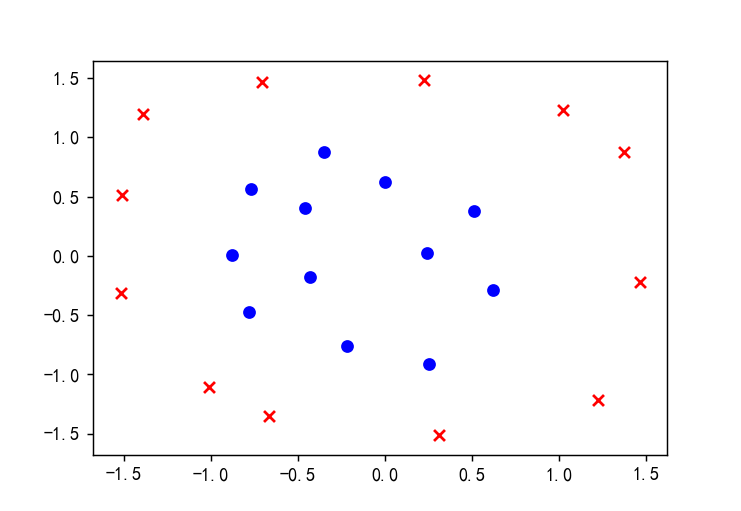

In [20]:
plt.scatter(x=df_inner["X_1"], y=df_inner["X_2"], marker="o", c="blue")
plt.scatter(x=df_outer["X_1"], y=df_outer["X_2"], marker="x", c="red")

### 生成向量和矩阵

In [21]:
df_tmp = pd.concat([df_inner, df_outer], ignore_index=True)
np_tmp = df_tmp.to_numpy()

In [22]:
np_tmp

array([[ 1.  , -0.88,  0.01,  0.  ],
       [ 1.  , -0.77,  0.56,  0.  ],
       [ 1.  , -0.78, -0.47,  0.  ],
       [ 1.  , -0.46,  0.4 ,  0.  ],
       [ 1.  , -0.43, -0.18,  0.  ],
       [ 1.  , -0.35,  0.88,  0.  ],
       [ 1.  , -0.22, -0.76,  0.  ],
       [ 1.  ,  0.  ,  0.62,  0.  ],
       [ 1.  ,  0.24,  0.02,  0.  ],
       [ 1.  ,  0.25, -0.91,  0.  ],
       [ 1.  ,  0.51,  0.38,  0.  ],
       [ 1.  ,  0.62, -0.29,  0.  ],
       [ 1.  , -1.51,  0.51,  1.  ],
       [ 1.  , -1.52, -0.31,  1.  ],
       [ 1.  , -1.39,  1.2 ,  1.  ],
       [ 1.  , -1.01, -1.11,  1.  ],
       [ 1.  , -0.71,  1.47,  1.  ],
       [ 1.  , -0.67, -1.35,  1.  ],
       [ 1.  ,  0.22,  1.48,  1.  ],
       [ 1.  ,  0.31, -1.51,  1.  ],
       [ 1.  ,  1.02,  1.23,  1.  ],
       [ 1.  ,  1.22, -1.22,  1.  ],
       [ 1.  ,  1.37,  0.88,  1.  ],
       [ 1.  ,  1.46, -0.22,  1.  ]])

In [23]:
X = np_tmp[:, :3]
X = np.column_stack( (X, X[:, 1]**2, X[:, 2]**2) )
y = np_tmp[:, [-1]]

X = np.matrix(X)
y = np.matrix(y)

In [24]:
X

matrix([[ 1.0000e+00, -8.8000e-01,  1.0000e-02,  7.7440e-01,  1.0000e-04],
        [ 1.0000e+00, -7.7000e-01,  5.6000e-01,  5.9290e-01,  3.1360e-01],
        [ 1.0000e+00, -7.8000e-01, -4.7000e-01,  6.0840e-01,  2.2090e-01],
        [ 1.0000e+00, -4.6000e-01,  4.0000e-01,  2.1160e-01,  1.6000e-01],
        [ 1.0000e+00, -4.3000e-01, -1.8000e-01,  1.8490e-01,  3.2400e-02],
        [ 1.0000e+00, -3.5000e-01,  8.8000e-01,  1.2250e-01,  7.7440e-01],
        [ 1.0000e+00, -2.2000e-01, -7.6000e-01,  4.8400e-02,  5.7760e-01],
        [ 1.0000e+00,  0.0000e+00,  6.2000e-01,  0.0000e+00,  3.8440e-01],
        [ 1.0000e+00,  2.4000e-01,  2.0000e-02,  5.7600e-02,  4.0000e-04],
        [ 1.0000e+00,  2.5000e-01, -9.1000e-01,  6.2500e-02,  8.2810e-01],
        [ 1.0000e+00,  5.1000e-01,  3.8000e-01,  2.6010e-01,  1.4440e-01],
        [ 1.0000e+00,  6.2000e-01, -2.9000e-01,  3.8440e-01,  8.4100e-02],
        [ 1.0000e+00, -1.5100e+00,  5.1000e-01,  2.2801e+00,  2.6010e-01],
        [ 1.0000e+00, -1.

In [25]:
#步长
step_alpha = 0.5
m, n  = X.shape

In [26]:
# 设置参数初始初始值全为1
theta = np.ones(n)
theta = np.matrix(theta)

df_cost = pd.DataFrame(columns=['steps', 'cost'])
df_cost.loc[0] = [0, cost(theta, X, y)]

for i in range(1, 1000):
    theta = grad_descent(theta, X, y, m)
    df_cost.loc[i] = [i, cost(theta, X, y)]

<IPython.core.display.Javascript object>


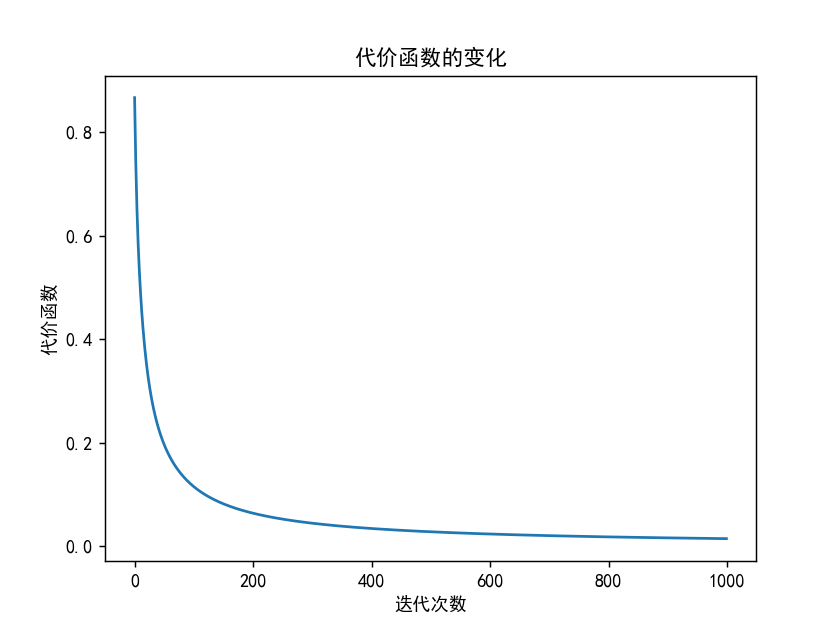

Text(0.5, 1.0, '代价函数的变化')

In [27]:
fig = plt.figure()
fig.add_subplot(1, 1, 1)
plt.plot(df_cost["steps"], df_cost["cost"] )
plt.xlabel("迭代次数")
plt.ylabel("代价函数")
plt.title("代价函数的变化")

In [28]:
theta

matrix([[-7.40426615,  0.53654858, -0.14229272,  5.1160043 ,  4.97420724]])

### 绘制决策边界函数
[参考链接1] https://blog.csdn.net/Cowry5/article/details/80261260  
[参考链接2] https://www.jb51.net/article/168071.htm

In [29]:
x = np.linspace(-2, 2, 100) # x坐标
y = np.linspace(-2, 2, 100) # y坐标
xx, yy = np.meshgrid(x, y)  # 生成网格数据

In [30]:
def feature_mapping(x_1, x_2):
    mylist = []
    for i, j in zip(x_1, x_2):
        item = theta[0, 0] + theta[0, 1]*i + theta[0, 2]*j + theta[0, 3]*i*i + theta[0, 4]*j*j
        mylist.append(item)
    
    return np.array(mylist)

In [31]:
# 生成高维特征数据并求出z
z = feature_mapping(xx.ravel(), yy.ravel())

In [32]:
# 保持维度一致
z = z.reshape(xx.shape)

<IPython.core.display.Javascript object>


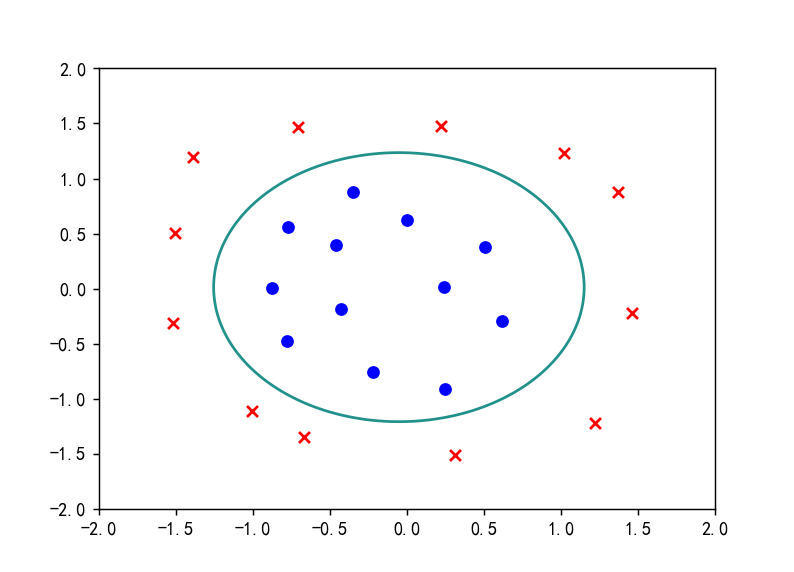

In [33]:
fig = plt.figure()
fig.add_subplot(1, 1, 1)
# 画图
plt.contour(xx, yy, z, 0)
plt.scatter(x=df_inner["X_1"], y=df_inner["X_2"], marker="o", c="blue")
plt.scatter(x=df_outer["X_1"], y=df_outer["X_2"], marker="x", c="red")